# Collegedunia -  Data Analysis Assesment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point
from sklearn.impute import KNNImputer
from geopy.distance import geodesic


# Sales and Revenue Analysis: Leverage order_items.csv and inventory_items.csv to analyse product sales, revenue, and profitability

In [2]:
order_items = pd.read_csv('./data/order_items.csv')
inventory_items = pd.read_csv('./data/inventory_items.csv')

In [3]:
print(order_items.shape)
print(inventory_items.shape)

(181759, 11)
(490705, 12)


In [4]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


In [5]:
inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [6]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181759 entries, 0 to 181758
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181759 non-null  int64  
 1   order_id           181759 non-null  int64  
 2   user_id            181759 non-null  int64  
 3   product_id         181759 non-null  int64  
 4   inventory_item_id  181759 non-null  int64  
 5   status             181759 non-null  object 
 6   created_at         181759 non-null  object 
 7   shipped_at         118281 non-null  object 
 8   delivered_at       63841 non-null   object 
 9   returned_at        18232 non-null   object 
 10  sale_price         181759 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.3+ MB


In [7]:
inventory_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490705 entries, 0 to 490704
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              490705 non-null  int64  
 1   product_id                      490705 non-null  int64  
 2   created_at                      490705 non-null  object 
 3   sold_at                         181759 non-null  object 
 4   cost                            490705 non-null  float64
 5   product_category                490705 non-null  object 
 6   product_name                    490676 non-null  object 
 7   product_brand                   490304 non-null  object 
 8   product_retail_price            490705 non-null  float64
 9   product_department              490705 non-null  object 
 10  product_sku                     490705 non-null  object 
 11  product_distribution_center_id  490705 non-null  int64  
dtypes: float64(2), i

In [8]:
order_items.isnull().sum() * 100 / len(order_items)

id                    0.000000
order_id              0.000000
user_id               0.000000
product_id            0.000000
inventory_item_id     0.000000
status                0.000000
created_at            0.000000
shipped_at           34.924268
delivered_at         64.876017
returned_at          89.969135
sale_price            0.000000
dtype: float64

In [9]:
inventory_items.isnull().sum() * 100 / len(inventory_items)

id                                 0.000000
product_id                         0.000000
created_at                         0.000000
sold_at                           62.959619
cost                               0.000000
product_category                   0.000000
product_name                       0.005910
product_brand                      0.081719
product_retail_price               0.000000
product_department                 0.000000
product_sku                        0.000000
product_distribution_center_id     0.000000
dtype: float64

## Analysing the order_items data

In [10]:
order_items.describe()

,id,order_id,user_id,product_id,inventory_item_id,sale_price
count,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000,181759.000000
mean,90880.000000,62579.982609,49983.272020,15254.151838,245291.860007,59.568544
std,52469.448126,36125.987285,28830.895739,8413.482833,141661.912894,66.657262
min,1.000000,1.000000,1.000000,1.000000,3.000000,0.020000
25%,45440.500000,31266.500000,25031.500000,7979.500000,122565.000000,24.500000
50%,90880.000000,62529.000000,49983.000000,15966.000000,245284.000000,39.990002
75%,136319.500000,93845.500000,74867.500000,22504.000000,367983.000000,69.949997
max,181759.000000,125226.000000,100000.000000,29120.000000,490705.000000,999.000000


In [11]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


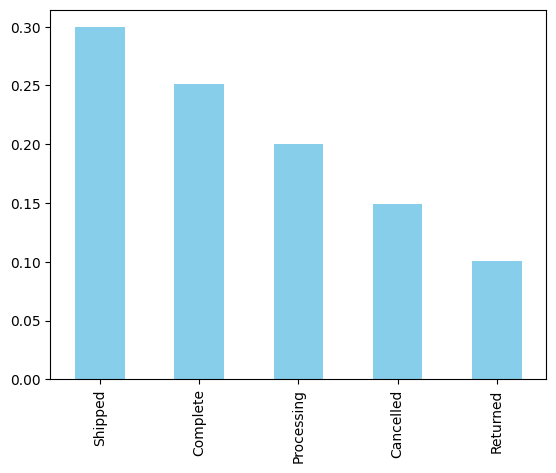

In [12]:
order_items['status'].value_counts(normalize = True).plot(kind = 'bar',color='skyblue')
plt.show()

In [13]:
order_items['status'].value_counts(normalize = True)

Shipped       0.299517
Complete      0.250931
Processing    0.200199
Cancelled     0.149044
Returned      0.100309
Name: status, dtype: float64

## 55% of orders are either shipped or completed and 10% returned

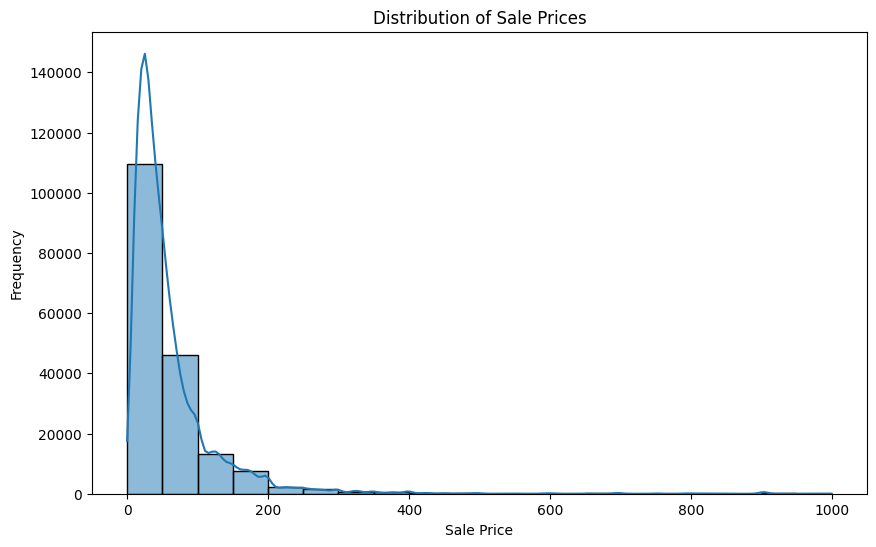

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=order_items, x='sale_price', bins=20, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

## Inference : Very high proportion of data is priced less than 200

In [15]:
order_items['created_at'] = pd.to_datetime(order_items['created_at'])

# Create a new column 'day_of_week' using a lambda function
order_items['day_of_week'] = order_items['created_at'].apply(lambda x: x.strftime('%A'))
order_items['month_created'] = order_items['created_at'].apply(lambda x: x.month)


In [16]:
order_items['day_of_week'].value_counts(normalize=True)

Monday       0.146023
Sunday       0.143916
Wednesday    0.142755
Tuesday      0.142507
Thursday     0.142447
Saturday     0.141715
Friday       0.140637
Name: day_of_week, dtype: float64

### Orders date do note seem to be much dependent on the day of the week

In [17]:
order_items.product_id.nunique()

29046

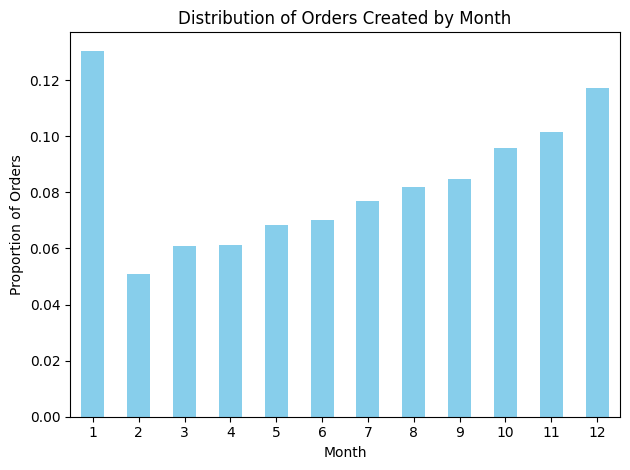

In [18]:
order_items['month_created'].value_counts(normalize=True).sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Orders Created by Month')
plt.xlabel('Month')
plt.ylabel('Proportion of Orders')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

## Inference: Highest number of order are Placed in the winter seasons (nov-jan)

In [19]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,day_of_week,month_created
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02,Sunday,5
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02,Tuesday,3
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02,Tuesday,12
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02,Friday,12
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02,Sunday,6


In [20]:
inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


### Merging  order  dataset on the basis of product_id  with inventory and joining only [product_category,product_name,product_brand,product_retail_price,product_department] columns

In [21]:
merged_df = pd.merge(order_items, inventory_items[['product_id', 'product_category', 'product_name', 'product_brand', 'product_retail_price', 'product_department','cost']],right_on='product_id' ,left_on='product_id', how='left')
merged_df.head(3)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,day_of_week,month_created,product_category,product_name,product_brand,product_retail_price,product_department,cost
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02,Sunday,5,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,0.0083
1,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02,Sunday,5,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,0.0083
2,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02,Sunday,5,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,0.0083


In [22]:
merged_df.status.unique()

array(['Cancelled', 'Complete', 'Shipped', 'Processing', 'Returned'],
      dtype=object)

In [23]:
merged_df.isnull().sum() * 100 / len(merged_df)

id                       0.000000
order_id                 0.000000
user_id                  0.000000
product_id               0.000000
inventory_item_id        0.000000
status                   0.000000
created_at               0.000000
shipped_at              34.829065
delivered_at            64.777262
returned_at             89.904416
sale_price               0.000000
day_of_week              0.000000
month_created            0.000000
product_category         0.000000
product_name             0.004040
product_brand            0.077631
product_retail_price     0.000000
product_department       0.000000
cost                     0.000000
dtype: float64

In [24]:
merged_df.shape
# (3588767, 19)

(3588767, 19)

In [25]:
order_items.shape,inventory_items.shape

((181759, 13), (490705, 12))

In [26]:
merged_df.drop(['shipped_at','delivered_at','returned_at'],axis = 1,inplace = True)
merged_df.dropna(subset=['product_brand'],inplace = True)  # negligible number if rows

In [27]:
merged_df.shape

(3585981, 16)

In [28]:
merged_df['product_category'].nunique()

26

In [29]:
merged_df['product_name'].nunique()

27215

In [30]:
merged_df['product_brand'].nunique()

2752

In [31]:
merged_df['product_department'].value_counts(normalize=True)

Men      0.541566
Women    0.458434
Name: product_department, dtype: float64

In [32]:
merged_df['product_id'].nunique()

29022

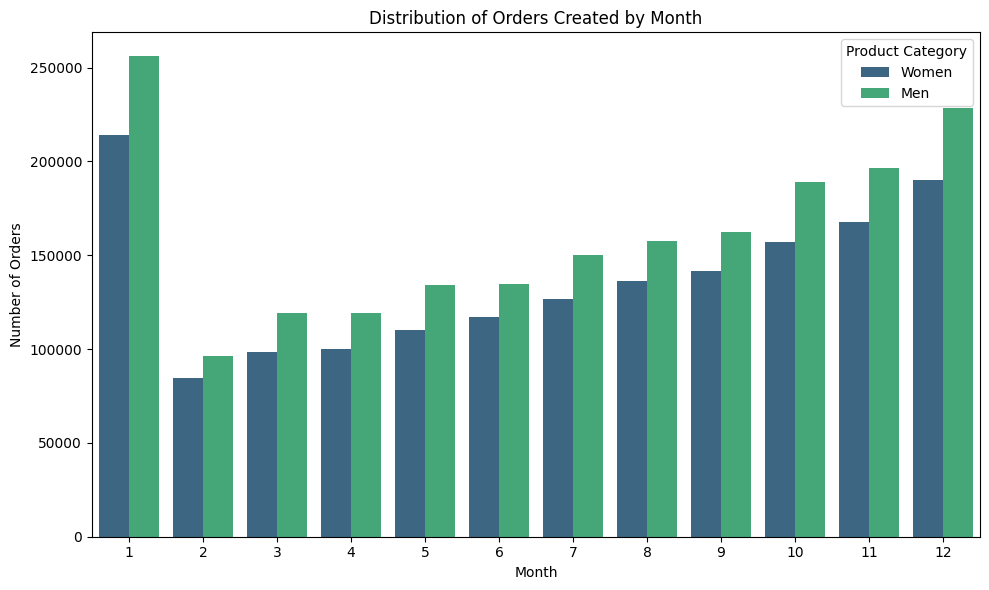

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='month_created', hue='product_department', palette='viridis')
plt.title('Distribution of Orders Created by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

## In all months, product_department - men have higher number of purchase.

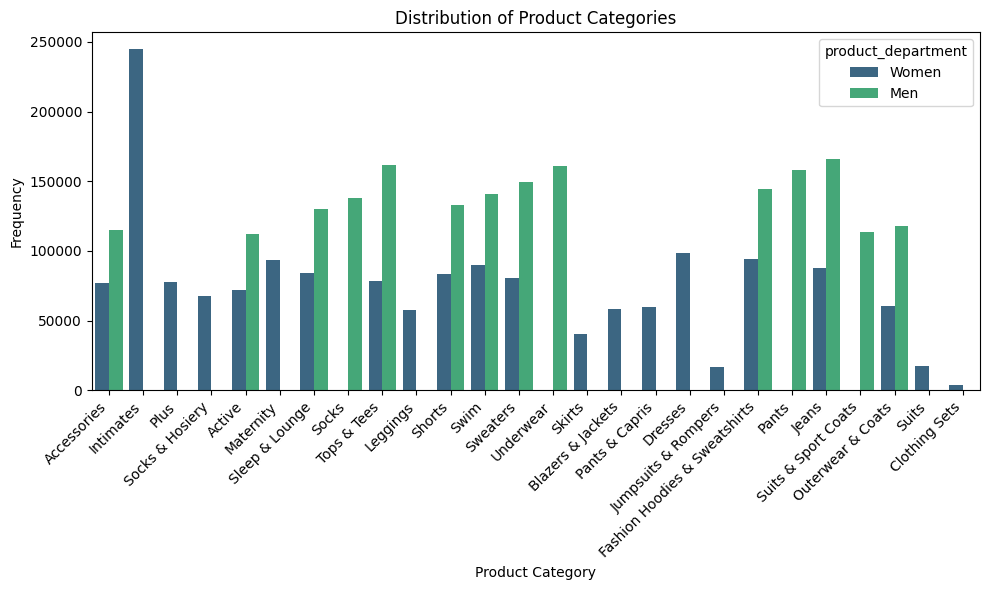

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='product_category', hue='product_department', palette='viridis')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## There is a notable number of products that are exclusive for women

In [35]:
merged_df['profit'] = merged_df['sale_price'] - merged_df['cost']

In [36]:
total_revenue = merged_df['profit'].sum()
total_revenue

111559298.7420401

## Total Revenue made from all the orders is 111559298.7420401

In [37]:
merged_df.head(1)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,sale_price,day_of_week,month_created,product_category,product_name,product_brand,product_retail_price,product_department,cost,profit
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,0.02,Sunday,5,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,0.0083,0.0117


In [38]:
average_revenue_per_order = merged_df['profit'].mean()
average_revenue_per_order

31.109841000841918

In [39]:
inventory_items

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
490700,311018,25590,2021-12-07 12:47:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490701,451084,25590,2023-10-10 11:57:57+00:00,2023-11-27 11:28:57+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490702,451085,25590,2020-11-20 05:55:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490703,486057,25590,2023-02-26 22:35:12+00:00,2023-04-23 01:24:12+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3


In [40]:
merged_df[merged_df['sale_price']!=merged_df['product_retail_price']]

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,sale_price,day_of_week,month_created,product_category,product_name,product_brand,product_retail_price,product_department,cost,profit


## Average revenue per sale 31.109841000841918

In [41]:
merged_df.groupby('month_created')['profit'].mean()

month_created
1     31.522479
2     31.037516
3     30.812681
4     30.565636
5     30.452244
6     30.626332
7     31.320669
8     31.019630
9     31.562169
10    31.516196
11    30.900557
12    31.232774
Name: profit, dtype: float64

## Considering only the orders which are having completed status as this would give is better understanding of the profit

In [42]:
completed_orders = merged_df[merged_df['status'] == 'Complete']

In [43]:
total_revenue = completed_orders['profit'].sum()
total_revenue

27951667.062018547

In [44]:
average_revenue_per_order = completed_orders['profit'].mean()
average_revenue_per_order

31.025864884055153

In [45]:
merged_df.isnull().sum()

id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
sale_price                0
day_of_week               0
month_created             0
product_category          0
product_name            145
product_brand             0
product_retail_price      0
product_department        0
cost                      0
profit                    0
dtype: int64

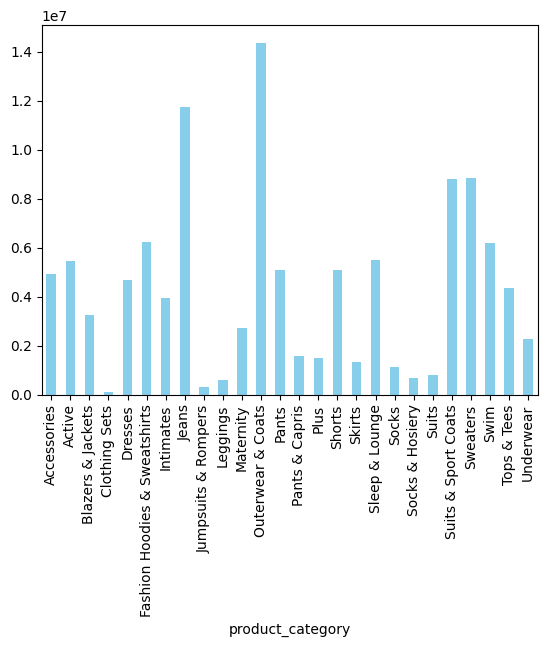

In [46]:
merged_df.groupby('product_category')['profit'].sum().plot(kind = 'bar',color='skyblue')
plt.show()

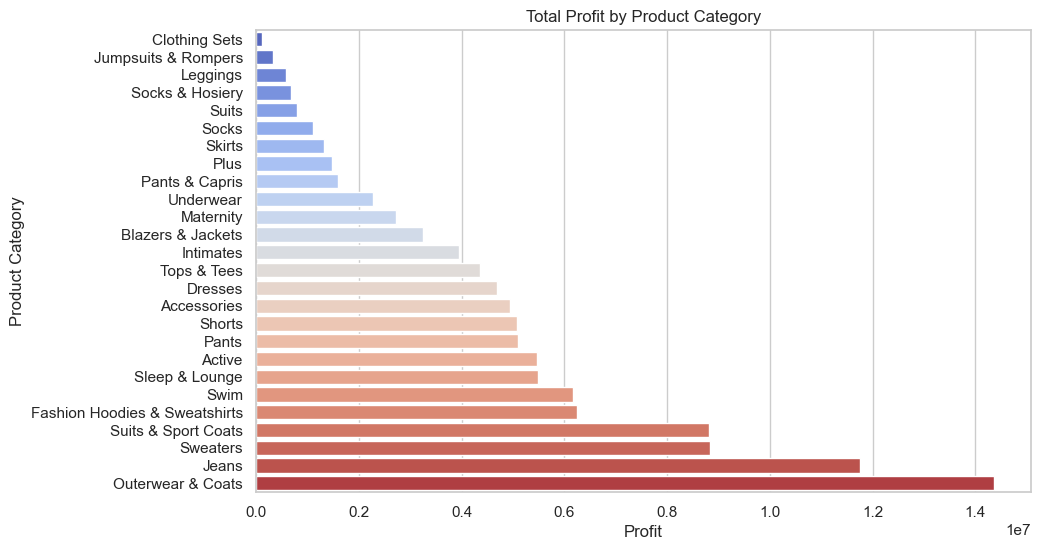

In [47]:
profit_by_category = merged_df.groupby('product_category')['profit'].sum().reset_index().sort_values(by = 'profit')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='product_category', data=profit_by_category, palette='coolwarm')
plt.title('Total Profit by Product Category')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.show()

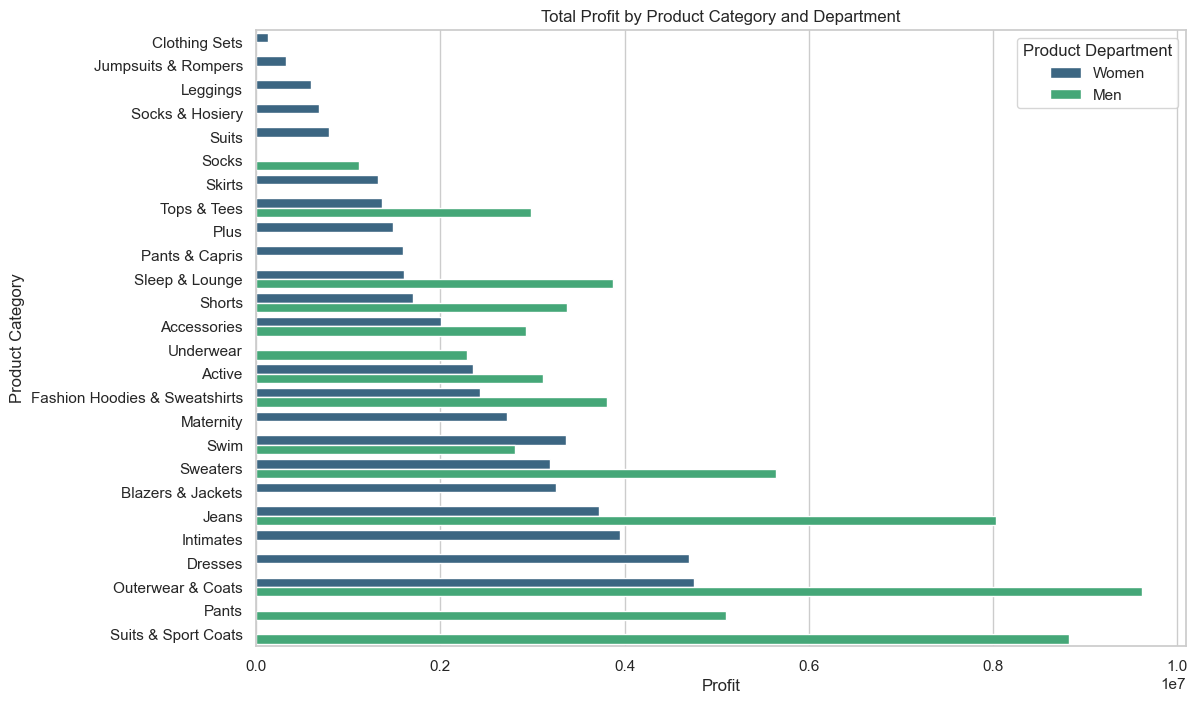

In [48]:
profit_by_category_dept = merged_df.groupby(['product_category','product_department'])['profit'].sum().reset_index().sort_values(by = 'profit')
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='product_category', hue='product_department', data=profit_by_category_dept, palette='viridis')
plt.title('Total Profit by Product Category and Department')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.legend(title='Product Department')
plt.show()

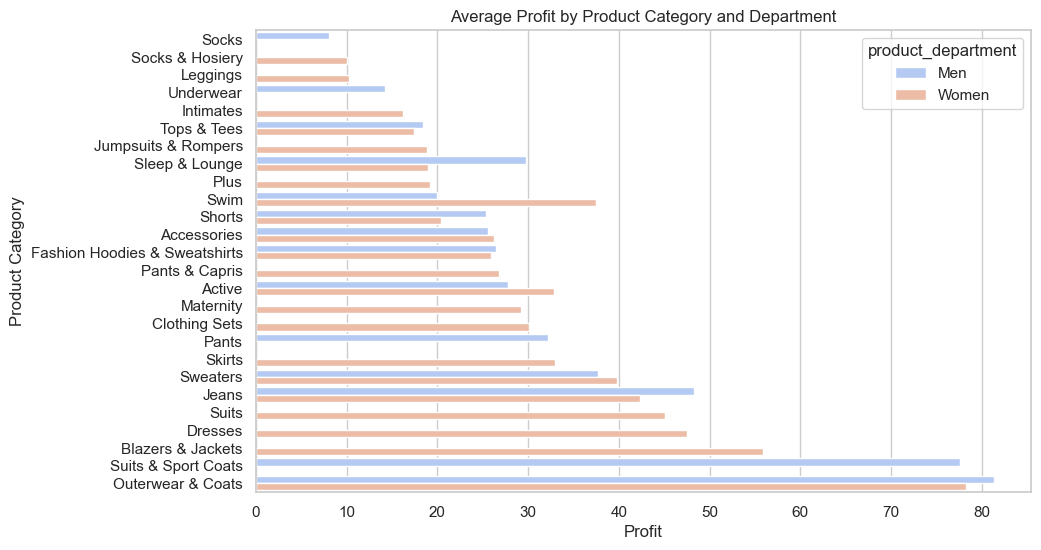

In [49]:
profit_mean_by_category = merged_df.groupby(['product_category','product_department'])['profit'].mean().reset_index().sort_values(by = 'profit')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='product_category',hue = 'product_department', data=profit_mean_by_category, palette='coolwarm')
plt.title('Average Profit by Product Category and Department')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.show()

In [50]:
# merged_df_inventory = pd.merge(inventory_items, order_items,left_on='id', right_on='inventory_item_id', how='inner')
# merged_df_inventory.head()

### Inference : Outerwear and Coats have the highest profit margin and Clothing sets,Jumpsuits and rompers have the lowest

## Volume of product orderedin each category

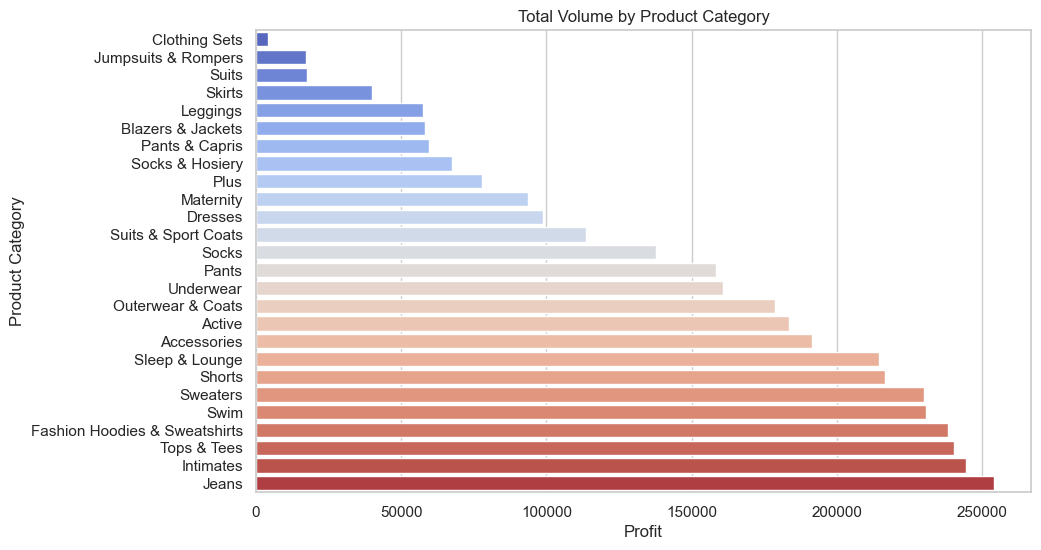

In [51]:
profit_by_category = merged_df.groupby('product_category')['profit'].count().reset_index().sort_values(by = 'profit')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='product_category', data=profit_by_category, palette='coolwarm')
plt.title('Total Volume by Product Category')
plt.xlabel('Profit')
plt.ylabel('Product Category')
plt.show()